In [1]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import os
import pandas as pd
from scipy import linalg
from utils import *
import pysift

In [2]:
#variáveis auxiliares

pasta_resultados = "../results/"
pasta_dados = "../data/"

In [3]:
#item 1

pontos_imagem_arquivo = pasta_dados+"image.txt"
pontos_real_arquivo = pasta_dados+"world.txt"


#leitura de arquivo dos pontos imagem para numpy
file = open(pontos_imagem_arquivo, 'r').read().split("\n")
file.pop(-1)

file[0] = file[0].split()
file[1] = file[1].split()

pontos_imagem = []

for i in range(len(file[0])):
    ponto = np.array([float(file[0][i]), float(file[1][i])])
    pontos_imagem.append(ponto)
    


#leitura de arquivo dos pontos reais para numpy
file = open(pontos_real_arquivo, 'r').read().split("\n")
file.pop(-1)

file[0] = file[0].split()
file[1] = file[1].split()
file[2] = file[2].split()

pontos_real = []

for i in range(len(file[0])):
    ponto = np.array([float(file[0][i]), float(file[1][i]), float(file[2][i])])
    pontos_real.append(ponto)
    

#pontos estão no formato [x, y, (z)]


In [4]:
#Obtençao da matrix de projeçao P

#acrescimo do numero 1 ao final de cada ponto para os calculos
for i in range(len(pontos_imagem)):
    pontos_imagem[i] = (pontos_imagem[i][0], pontos_imagem[i][1], 1)
    pontos_real[i] = (pontos_real[i][0], pontos_real[i][1], pontos_real[i][2], 1)
    
pontos_imagem = np.array(pontos_imagem)
pontos_real = np.array(pontos_real)

In [5]:
#calcula matriz de projeção e erro com base nos pontos da imagem e do real

projection_matrix, projectionError = create_projection_dlt(pontos_imagem, pontos_real)

print("Matriz de projecao para os pontos de 3d para 2d")

print(projection_matrix)

print(projectionError)



Matriz de projecao para os pontos de 3d para 2d
[[ 1.93791968e+15  3.87583936e+15  5.81375903e+15  7.75167871e+15]
 [ 7.75167871e+15  5.81375903e+15  3.87583936e+15  1.93791968e+15]
 [ 1.93791968e+15 -2.54434545e+00  1.93791968e+15  1.00000000e+00]]
7.021666937153402e-15


In [6]:
#Decomposicao RQ

k, rt = linalg.rq(projection_matrix, mode='economic')

print("matriz K")
print(k)
print("\n\n")
print("matriz Rt")
print(rt)

R = rt[:, 0:3]

print("\n\n")
print("matriz R")
print(R)

print("\n\n")
print("matriz KR")
kr = k@R
kr = kr/kr[2][2]
print(kr)

matriz K
[[ 7.91152396e+15  4.47543379e+15 -5.48126458e+15]
 [ 0.00000000e+00  6.71315069e+15 -8.22189687e+15]
 [ 0.00000000e+00  0.00000000e+00 -2.74063229e+15]]



matriz Rt
[[-4.08248290e-01 -1.02650023e-15  4.08248290e-01  8.16496581e-01]
 [ 2.88675135e-01  8.66025404e-01 -2.88675135e-01  2.88675135e-01]
 [-7.07106781e-01  9.28378995e-16 -7.07106781e-01 -4.44089210e-16]]



matriz R
[[-4.08248290e-01 -1.02650023e-15  4.08248290e-01]
 [ 2.88675135e-01  8.66025404e-01 -2.88675135e-01]
 [-7.07106781e-01  9.28378995e-16 -7.07106781e-01]]



matriz KR
[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [ 4.00000000e+00  3.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00 -1.31292617e-15  1.00000000e+00]]


In [7]:
#item 2

P1 = np.array([[800/math.sqrt(2), 0, 2400/math.sqrt(2), 4000],[-700/math.sqrt(2), 1400, 700/math.sqrt(2), 4900],[-1/math.sqrt(2), 0, 1/math.sqrt(2), 3]])
P2 = np.array([[1000, -250, 250*math.sqrt(3), 500],[0, 500*(math.sqrt(3)-1/2), 500*(1 + math.sqrt(3)/2), 500],[0, -1/2, math.sqrt(3)/2, 1]])

In [8]:
#normalizacao das matrizes dadas
# P_norm = K^(-1)*P

k, rt = linalg.rq(P1, mode='economic')

print("matriz K")
print(k)
print("\n\n")
print("matriz Rt")
print(rt)
print("\n\n")

P1_norm = np.dot(np.linalg.inv(k),P1)

print("Matriz de projecao normalizada")
print(P1_norm)


matriz K
[[-1.65615734e+03  2.70449362e+02 -4.04771541e+03]
 [ 0.00000000e+00  1.65650234e+03 -4.86990760e+03]
 [ 0.00000000e+00  0.00000000e+00 -3.16227766e+00]]



matriz Rt
[[-0.82951506  0.13801311 -0.53674504 -0.06900656]
 [ 0.35856858  0.84515425 -0.35856858  0.16903085]
 [ 0.2236068  -0.         -0.2236068  -0.9486833 ]]



Matriz de projecao normalizada
[[-0.82951506  0.13801311 -0.53674504 -0.06900656]
 [ 0.35856858  0.84515425 -0.35856858  0.16903085]
 [ 0.2236068   0.         -0.2236068  -0.9486833 ]]


In [9]:
#normalizacao das matrizes dadas
# P_norm = K^(-1)*P

k, rt = linalg.rq(P2, mode='economic')

print("matriz K")
print(k)
print("\n\n")
print("matriz Rt")
print(rt)
print("\n\n")

P2_norm = np.dot(np.linalg.inv(k),P2)

print("Matriz de projecao normalizada")
print(P2_norm)

matriz K
[[ 1.00000000e+03  1.30134404e-14 -7.07106781e+02]
 [ 0.00000000e+00 -1.00000000e+03 -7.07106781e+02]
 [ 0.00000000e+00  0.00000000e+00 -1.41421356e+00]]



matriz Rt
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -8.66025404e-01 -5.00000000e-01 -8.85922642e-17]
 [-0.00000000e+00  3.53553391e-01 -6.12372436e-01 -7.07106781e-01]]



Matriz de projecao normalizada
[[ 1.00000000e+00 -8.32667268e-17  1.44222201e-16  1.66533454e-16]
 [ 0.00000000e+00 -8.66025404e-01 -5.00000000e-01 -1.11022302e-16]
 [ 0.00000000e+00  3.53553391e-01 -6.12372436e-01 -7.07106781e-01]]


In [10]:
#item 3

c1 =calculate_camera_center(P1_norm)
c1 = np.concatenate((c1, [1]))
c1

array([ 1.41421356, -2.        , -2.82842712,  1.        ])

In [11]:
ponto_epipolar = np.dot(P2_norm, c1)
ponto_epipolar = ponto_epipolar/ponto_epipolar[2]
ponto_epipolar

array([4.44948974, 9.89897949, 1.        ])

In [12]:
P1_mais = P1_norm.T@np.linalg.inv(P1_norm@P1_norm.T)
# x eh o ponto epipolar
ex = [[0, -ponto_epipolar[2], ponto_epipolar[1]],[ponto_epipolar[2], 0, -ponto_epipolar[0]],[-ponto_epipolar[1], ponto_epipolar[0], 0]]
M_Fundamental = ex@P2_norm@P1_mais

In [13]:
#item 3
M_Fundamental

array([[ 4.07086628,  4.50096562,  7.8841075 ],
       [-2.72623409, -1.41616294, -3.37047314],
       [ 8.87365761, -6.00843245, -1.71601103]])

In [14]:
#item 4

#names of image files in pairs

#img1 = cv2.imread(pasta_dados+"ex-12-F-eins.jpg", 0)
#img2 = cv2.imread(pasta_dados+"ex-12-F-zwei.jpg", 0)

#img1 = cv2.imread(pasta_dados+"chapel00.png", 0)
#img2 = cv2.imread(pasta_dados+"chapel01.png", 0)

img1 = cv2.imread(pasta_dados+"keble000.png", 0)
img2 = cv2.imread(pasta_dados+"keble003.png", 0)

#img1 = cv2.imread(pasta_dados+"bt000.png", 0)
#img2 = cv2.imread(pasta_dados+"bt006.png", 0)


In [15]:
#calcula pontos de interesse e seus respectivos matches 

pontos_sift1, pontos_sift2 = calculate_SIFT(img1, img2)



In [16]:
pts1 = pontos_sift1
pts2 = pontos_sift2

In [17]:
#calculo do algoritmo de 8 pontos com 3 diferentes testes/configurações

# 1 - utilizando ransac com o alg de 8 pontos sem condição de rank 2 sem normalização
# 2 - utilizando ransac com o alg de 8 pontos com condição de rank 2 sem normalização
# 3 - utilizando ransac com o alg de 8 pontos com condição de rank 2 com normalização

#F, pts1, pts2 = automatic_fundamental_8_points_sem_rank(pts1, pts2)

#F, pts1, pts2 = automatic_fundamental_8_points(pts1, pts2)

F, pts1, pts2 = automatic_fundamental_8_points_norm(pts1, pts2)


F

array([[-8.37073226e-07, -5.79260162e-05,  9.31814539e-03],
       [ 5.75359439e-05, -1.37455736e-06, -1.45549803e-02],
       [-9.69697929e-03,  9.47783849e-03,  1.00000000e+00]])

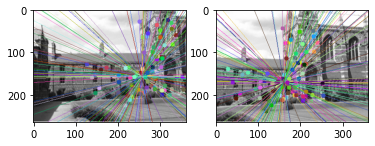

In [18]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image


lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()


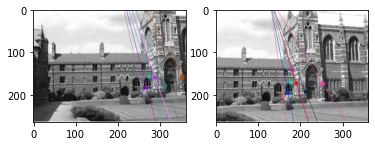

In [19]:
#item 5

points_selected = []

if len(pts1)>7:
    while len(points_selected) < 7:
        r=np.random.randint(len(pts1))
        if r not in points_selected:
            points_selected.append(r)

    points_selected = np.array(points_selected)       

    pts1 = pts1[points_selected]
    pts2 = pts2[points_selected]


F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_7POINT )

#7-poit can return 1 or 3 matrixes

if len(F)>3:
    Fs=F.reshape(3, 3, 3)
    F = Fs[0]
    
#F = Fs[np.random.randint(3)]


# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [20]:
#item 6
#load points from matlab file
from scipy.io import loadmat

#points_2d = np.array(loadmat(pasta_dados+'kronandata.mat')['x']).astype('float64')

points_2d = loadmat(pasta_dados+'kronandata.mat')['x']

pontos1 = points_2d[0][0].T
pontos2 = points_2d[1][0].T

pts1 = []
pts2 = []

for i in range(len(pontos1)):
    pts1.append(pontos1[i][0:2]) 
    pts2.append(pontos2[i][0:2])


In [21]:
img1 = cv2.imread(pasta_dados+"kronan1.jpg", 0)
img2 = cv2.imread(pasta_dados+"kronan2.jpg", 0)

In [38]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,5)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

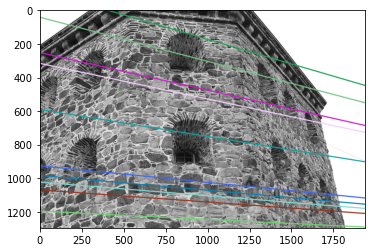

In [23]:
   
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
#F, mask = cv2.findFundamentalMat(pontos1,pontos2,cv2.FM_RANSAC)
#F, mask = cv2.findFundamentalMat(pontos1,pontos2,cv2.FM_8POINT)
 


# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

points_selected = []

if len(pts1)>10:
    while len(points_selected) < 10:
        r=np.random.randint(len(pts1))
        if r not in points_selected:
            points_selected.append(r)

    points_selected = np.array(points_selected)       

    pts1 = pts1[points_selected]
    pts2 = pts2[points_selected]

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.imshow(img5)
plt.show()

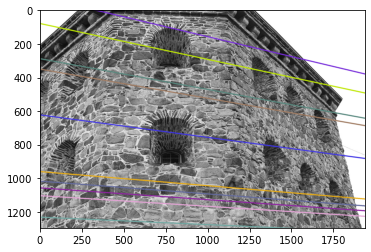

In [24]:
plt.imshow(img3)
plt.show()

In [25]:
#item 7
# gold standard method

In [26]:
# read data to perform tasks
# names of image files in pairs

img1 = cv2.imread(pasta_dados+"mesaTrabalho_esquerda.png")
img2 = cv2.imread(pasta_dados+"mesaTrabalho_direita.png")

points_2d = loadmat(pasta_dados+'pontos_mesa_de_trabalho.mat')
pts1 = points_2d['ptsIm1']
pts2 = points_2d['ptsIm2']

pts1 = pts1.T
pts2 = pts2.T

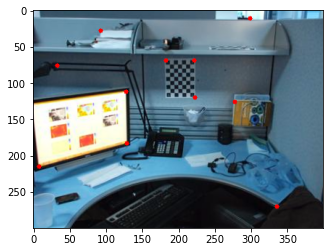

In [27]:
for p in pts1:
    img1 = cv2.circle(img1,tuple(np.int32(p[0:2])),3,[255,0,0],-1)

plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.show()


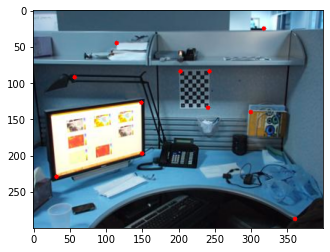

In [28]:
for p in pts2:
    img2 = cv2.circle(img2,tuple(np.int32(p[0:2])),3,[255,0,0],-1)

plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.show()

In [29]:
img1 = cv2.imread(pasta_dados+"mesaTrabalho_esquerda.png", 0)
img2 = cv2.imread(pasta_dados+"mesaTrabalho_direita.png", 0)

In [30]:
#normalização dos pontos


T1, pts1 = normalize2(pts1[:, 0:2])
T2, pts2 = normalize2(pts2[:, 0:2])

print(T1)
print("aaaaaaaaaaaaa")
print(T2)

[[ 0.01110681  0.         -1.95587948]
 [ 0.          0.01110681 -1.29501401]
 [ 0.          0.          1.        ]]
aaaaaaaaaaaaa
[[ 0.01115095  0.         -2.20448114]
 [ 0.          0.01115095 -1.4688938 ]
 [ 0.          0.          1.        ]]


In [31]:
# algoritmo de 8 pontos normalizado com os primeiros 8 pontos da imagem

#reinicia o valor dos pontos
pts1 = points_2d['ptsIm1']
pts2 = points_2d['ptsIm2']

pts1 = pts1.T[:, 0:2]
pts2 = pts2.T[:, 0:2]

F = compute_fundamental_8_point_normalized(pts1[0:8,:], pts2[0:8,:])

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

print(F)

[[ 4.75111452e-06 -3.64343333e-04  3.51530056e-02]
 [ 3.67925257e-04  3.40223870e-06 -9.46816761e-02]
 [-4.29526625e-02  1.00311267e-01  1.00000000e+00]]


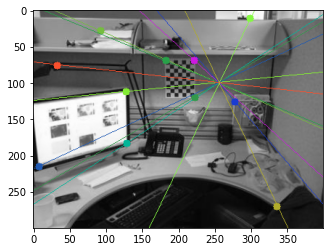

In [39]:

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

plt.imshow(img5)
plt.show()

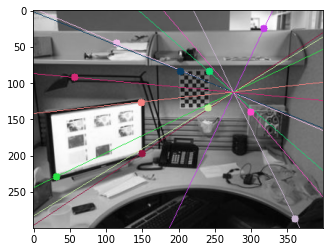

In [40]:
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.imshow(img3)
plt.show()

In [41]:
#os pontos epipolares são a interceção de todas as retas!!!!

In [57]:
#implemente o gold standard


#reinicia valores das imagens e pontos
img1 = cv2.imread(pasta_dados+"mesaTrabalho_esquerda.png", 0)
img2 = cv2.imread(pasta_dados+"mesaTrabalho_direita.png", 0)

pts1 = points_2d['ptsIm1']
pts2 = points_2d['ptsIm2']

pts1 = pts1.T[0:8, 0:2]
pts2 = pts2.T[0:8, 0:2]


F, pts1, pts2 = automatic_fundamental_8_points_norm(pts1, pts2)


In [58]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        
    return img1,img2

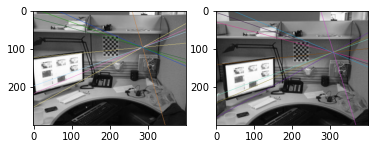

In [59]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [44]:
#item 8

In [45]:
# carrega as variáveis da seguinte maneira: 

# Pontos_3d = pontos no mundo real
# pts1 = pontos 2d na imagem 1
# pts2 = pontos 2d na imagem 2
# K1 = matriz K da camera referente a imagem 1
# K2 = matriz K da camera referente a imagem 2

pontos_3D = pd.read_excel(pasta_dados+ "dados_questao_08.ods", engine = "odf",header=None, sheet_name="points3d_synthetic").to_numpy()
pontos_2D = pd.read_excel(pasta_dados+ "dados_questao_08.ods", engine = "odf",header=None, sheet_name="points2d_synthetic").to_numpy()

pontos_3D = pontos_3D.T
pontos_2D = pontos_2D.T

pontos_2D_1 = pontos_2D[0:55]
pontos_2D_2 = pontos_2D[55:]

K1 =   [[6.,0.,7.],
        [0.,8.,9.],
        [0.,0.,1.]]


K2 =   [[5.,0.,3.],
        [0.,5.,2.],
        [0.,0.,1.]]

K1 = np.array(K1)
K2 = np.array(K2)

#retira pontos repetidos
pts3d = []
pts1 = []
pts2 = []

for i in range(len(pontos_3D)):
    if not any((pontos_3D[i] == x).all() for x in pts3d):
    #if pontos_3D[i] not in pts3d:
        pts3d.append(pontos_3D[i])
        pts1.append(pontos_2D_1[i])
        pts2.append(pontos_2D_2[i])
        
pts1 = np.array(pts1)
pts2 = np.array(pts2)
pts3d = np.array(pts3d)
#print(len(pts3d))
#print(len(pts1))
#print(len(pts2))

#print(pontos_3D)
#print(pts3d)


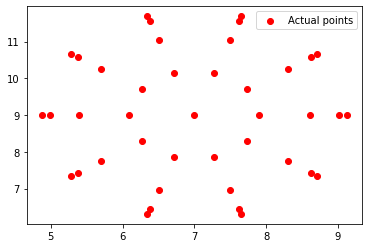

In [46]:
_, ax = plt.subplots()
ax.scatter(pts1[:, 0], pts1[:, 1], c='red', marker='o', label='Actual points')
ax.legend()

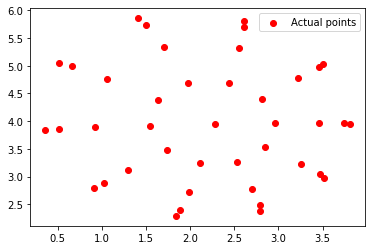

In [47]:
_, ax = plt.subplots()
ax.scatter(pts2[:, 0], pts2[:, 1], c='red', marker='o', label='Actual points')
ax.legend()

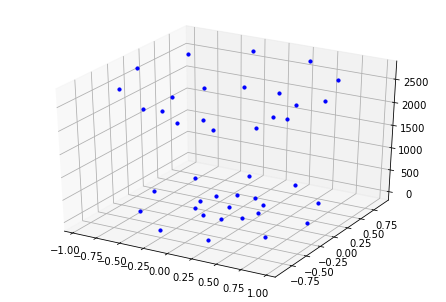

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax.scatter(pts3d[:, 0], pts3d[:, 1], pts3d[:, 2], c='blue', marker='o', s=10, depthshade=0)

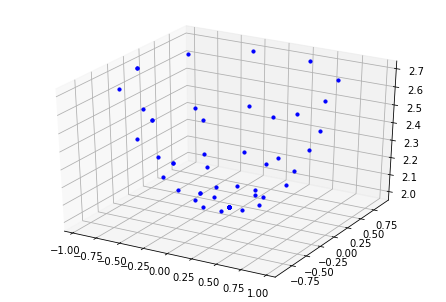

In [49]:
#points_3d = loadmat(pasta_dados+'data_sphere.mat')

import h5py

arrays = {}
f = h5py.File(pasta_dados+'data_sphere.mat', 'r')
for k, v in f.items():
    arrays[k] = np.array(v)
    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax.scatter(arrays['points3d_synthetic'][:, 0], arrays['points3d_synthetic'][:, 1], arrays['points3d_synthetic'][:, 2], c='blue', marker='o', s=10, depthshade=0)


In [50]:
#print(pontos_3D)
#print(arrays['points3d_synthetic'])

In [51]:
# compute a matriz fundamental F

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

F= np.array(F)

print(F)

[[ 0.01418916 -0.01420987  0.06497396]
 [ 0.0142264   0.00912047 -0.24426771]
 [-0.14210592  0.01764647  1.        ]]


In [52]:
# compute a matriz Essencial E

E = K2.T @ F @ K1

print(E)

[[ 0.42567483 -0.56839478  0.18204632]
 [ 0.42679215  0.36481866 -0.31299341]
 [-0.42651374 -0.05393761  0.14810729]]


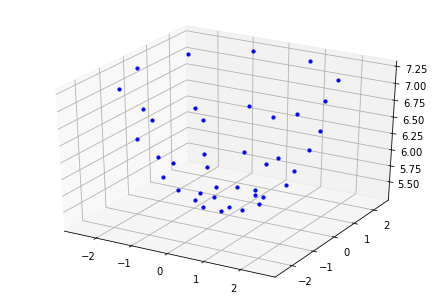

In [53]:
#compute as matrizes de câmera para os 2 conjuntos de pontos a partir da essencial


#print(pts1[:, 0:2])
#print(pts1)


points, R, t, mask = cv2.recoverPose(E, pts1[:, 0:2], pts2[:, 0:2])

M2 = np.hstack((R, t))
M1 = np.hstack((np.eye(3, 3), np.zeros((3, 1))))


P1 = np.dot(K1,  M1)
P2 = np.dot(K2,  M2)

point_4d_hom = cv2.triangulatePoints(P1, P2, np.expand_dims(pts1[:, 0:2], axis=1), np.expand_dims(pts2[:, 0:2], axis=1))
point_4d = point_4d_hom / np.tile(point_4d_hom[-1, :], (4, 1))
point_3d = point_4d[:3, :].T

point_4d= point_4d.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax.scatter(point_3d[:, 0], point_3d[:, 1], point_3d[:, 2], c='blue', marker='o', s=10, depthshade=0)

In [54]:
print(P1.shape)
print(point_4d.shape)

pts1 = P1@point_4d.T
pts1 = pts1.T

pts2 = P2@point_4d.T
pts2 = pts2.T

print(pts1.shape)
print(pts2.shape)

for i in range(len (pts1)):
    pts1[i]=pts1[i]/pts1[i][2]
    pts2[i]=pts2[i]/pts2[i][2]

(3, 4)
(41, 4)
(41, 3)
(41, 3)


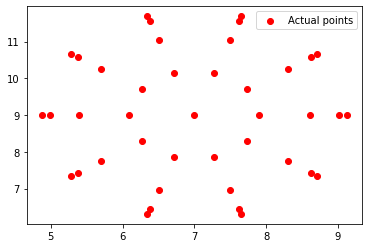

In [55]:
_, ax = plt.subplots()
ax.scatter(pts1[:, 0], pts1[:, 1], c='red', marker='o', label='Actual points')
ax.legend()

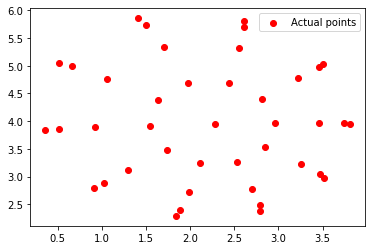

In [56]:
_, ax = plt.subplots()
ax.scatter(pts2[:, 0], pts2[:, 1], c='red', marker='o', label='Actual points')
ax.legend()